Duplicate dates found. Handling duplicates...


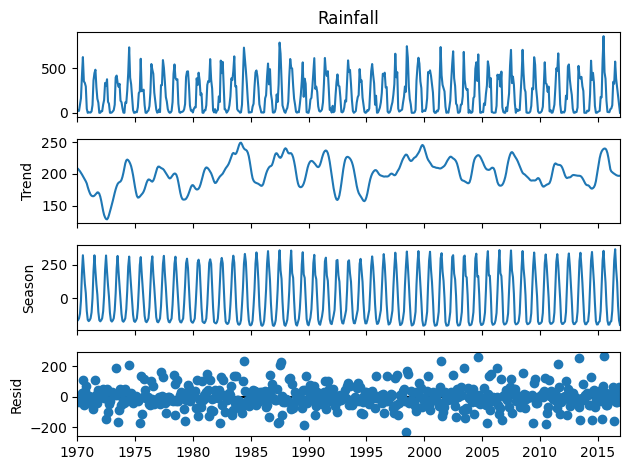

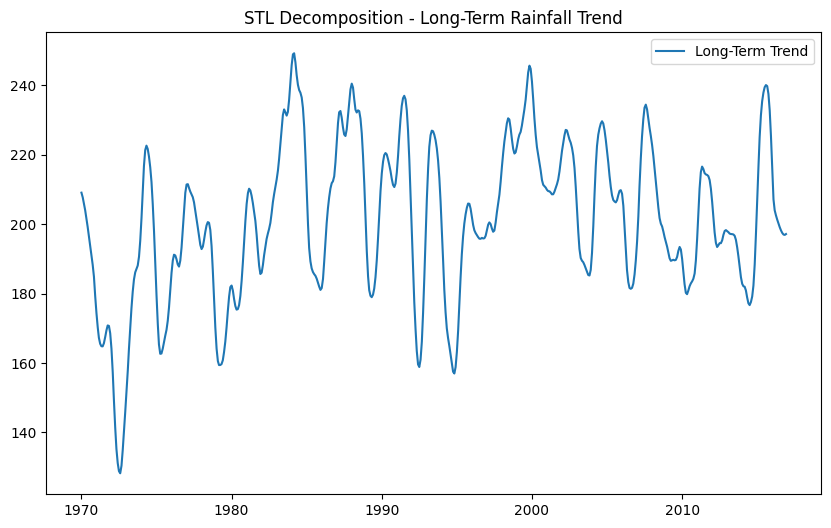

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/data_monthly_rainfall.csv')

# Convert 'Year' and 'Month' to a datetime object
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Check for duplicate dates
duplicates = data[data.duplicated(subset=['Date'], keep=False)]
if not duplicates.empty:
    print("Duplicate dates found. Handling duplicates...")

# Remove duplicates by taking the mean for duplicate rows
data = data.groupby('Date').agg({'Rainfall': 'mean'}).reset_index()

# Set the 'Date' as index
data.set_index('Date', inplace=True)

# Set the frequency of the time series to monthly (after removing duplicates)
data = data.asfreq('MS')

# Handle missing values (replace missing values with the mean)
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mean())

# Perform STL decomposition - Set seasonal to an odd number (e.g., 13 for monthly data)
stl = STL(data['Rainfall'], seasonal=13)
result = stl.fit()

# Plot the decomposition
result.plot()
plt.show()

# Access trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot long-term trend
plt.figure(figsize=(10, 6))
plt.plot(trend, label='Long-Term Trend')
plt.title('STL Decomposition - Long-Term Rainfall Trend')
plt.legend()
plt.show()
